<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import math
from IPython.display import HTML, display

seaborn.set_context('talk')

In [2]:
def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    
    display(HTML('<img src onerror="{}" style="display:none">'.format(script)))

In [3]:
cell_color = '#e6b530'
set_background(cell_color)

import math
import time

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [4]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [5]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

<span style='background:#e6b530'> Limpieza de datos  </span>


In [6]:
cell_color = '#e6b530'
set_background(cell_color)
df.isna().sum()

profile_gender                                     0
profile_age                                        0
work_country                                       0
work_province                                      0
profile_years_experience                           0
work_years_in_company                              0
work_years_in_current_position                     0
work_people_in_charge_of                           0
profile_studies_level                              0
profile_studies_level_state                        0
profile_career                                   299
profile_university                               534
profile_specialization_courses                     0
profile_open_source_contributions                  0
profile_programming_as_hobby                       0
work_role                                          0
tools_platform                                     2
tools_programming_languages                        1
tools_frameworks                              

<span style='background:#e6b530'>Se detecta que existen  filas que las cuales tienen el campo salary_monthly_NETO sin información (212 filas en esta condición)</span>

In [7]:
set_background(cell_color)
cantidad_salary_monthly_NETO_nulos = df.salary_monthly_NETO.isna().sum()
cantidad_filas_df = df.shape[0]
print (" Total de filas df: {0}, total de filas donde salary_monthly_NETO no tiene valoes: {1} , % {2} ".format(cantidad_filas_df, cantidad_salary_monthly_NETO_nulos ,   cantidad_salary_monthly_NETO_nulos / cantidad_filas_df * 100 ))

 Total de filas df: 6095, total de filas donde salary_monthly_NETO no tiene valoes: 212 , % 3.4782608695652173 


<span style='background:#e6b530'> Corregimos las filas que no tiene salario NETO. Para ello tomamos el bruto y lo multiplicamos x 0,83 </span>

In [8]:
set_background(cell_color)
#Para las filas que no tienen neto, hacemos BRUTO * 0.83
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if math.isnan(x.salary_monthly_NETO)   else x['salary_monthly_NETO'], axis=1)    

<span style='background:#e6b530'>Controlamos que no existan más filas con NETO sin valores (debe ser 0 la cantidad de filas que no tienen salario neto) </span>

In [9]:
set_background(cell_color)
df['salary_monthly_BRUTO'].isna().sum()

0

<span style='background:#e6b530'>Vemos cuantos casos tenemos de salarios Netos mayores a salarios brutos</span>

In [10]:
set_background(cell_color)
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

156

<span style='background:#e6b530'>Vamos a poner como bruto al neto, y luego recalculamos en neto (no se contempla descuento de ganancias, descontamos un 17% entre jub, obra soc y otros)
</span>


In [11]:
set_background(cell_color)
df['recalculate_salary'] = df.apply(lambda x:  x['salary_monthly_NETO'] >  x['salary_monthly_BRUTO'], axis=1)    

df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_NETO'] if x['recalculate_salary']   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if x['recalculate_salary']   else x['salary_monthly_NETO'], axis=1)    

<span style='background:#e6b530'>Verificamos que no existan mas salarios netos matores a salarios brutos </span>

In [12]:
set_background(cell_color)
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

0

<span style='background:#e6b530'>Muchos sueldos están expresados en unidades de mil. Por ejemplo para 82000, ponen 82. Vamos a convertir esos sueldos al formato del resto </span>

In [13]:
set_background(cell_color)
limit = 200
df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 1000 if x['salary_monthly_BRUTO'] < limit   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_NETO'] * 1000 if x['salary_monthly_NETO'] < limit   else x['salary_monthly_NETO'], axis=1)    

In [14]:
set_background(cell_color)
limit_us = 10000
filtro_dolar = 'Mi sueldo está dolarizado'

df_salary_to_convert = ((df.salary_monthly_NETO <= limit_us) & (df.salary_in_usd == filtro_dolar) )

print(f"Cantidad de salarios <= {limit_us} : {df_salary_to_convert.sum()}, % respecto al total {df_salary_to_convert.sum()  / df.shape[0] }")



Cantidad de salarios <= 10000 : 17, % respecto al total 0.002789171452009844


In [15]:
df[df_salary_to_convert][['salary_monthly_NETO','salary_in_usd']]

,salary_monthly_NETO,salary_in_usd
224,5000.0,Mi sueldo está dolarizado
924,6000.0,Mi sueldo está dolarizado
1425,260.0,Mi sueldo está dolarizado
1701,307.1,Mi sueldo está dolarizado
1828,4000.0,Mi sueldo está dolarizado
2376,610.0,Mi sueldo está dolarizado
3563,373.5,Mi sueldo está dolarizado
3632,1311.0,Mi sueldo está dolarizado
3771,4300.0,Mi sueldo está dolarizado
3791,685.0,Mi sueldo está dolarizado


<span style='background:#e6b530'>
Convertimos a $ los sueldos dolarizados. Tomamos como fuente el valor reportado en https://www.cotizacion-dolar.com.ar/dolar-blue-historico-2020.php . Se toma fecha 25/08/2020, valor venta
</span>

In [16]:
set_background(cell_color)
valor_dolar = 137

df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * valor_dolar if (( x['salary_monthly_BRUTO']  < limit_us) & (x['salary_in_usd'] == filtro_dolar ))   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO']  = df.apply(lambda x: x['salary_monthly_NETO']  * valor_dolar if (( x['salary_monthly_NETO']  < limit_us) & (x['salary_in_usd'] == filtro_dolar ))  else x['salary_monthly_NETO'], axis=1)    


<span style='background:#e6b530'> Controlamos que no queden sueldos en dolares menores a 10.000 </span>

In [17]:
set_background(cell_color)

#df_salary_to_convert = ((df.salary_monthly_NETO <= limit_us) & (df.salary_in_usd == filtro_dolar) )

print(f"Cantidad de salarios <= {limit_us} : {df_salary_to_convert.sum()}, % respecto al total {df_salary_to_convert.sum()  / df.shape[0] }")



Cantidad de salarios <= 10000 : 17, % respecto al total 0.002789171452009844


In [18]:
set_background(cell_color)
df[df.salary_in_usd==filtro_dolar][['salary_monthly_NETO','salary_in_usd']]

,salary_monthly_NETO,salary_in_usd
14,80000.0,Mi sueldo está dolarizado
25,98700.0,Mi sueldo está dolarizado
41,280000.0,Mi sueldo está dolarizado
43,126500.0,Mi sueldo está dolarizado
60,345420.0,Mi sueldo está dolarizado
...,...,...
6021,210000.0,Mi sueldo está dolarizado
6024,400000.0,Mi sueldo está dolarizado
6079,80000.0,Mi sueldo está dolarizado
6080,391000.0,Mi sueldo está dolarizado


<span style='background:#e6b530'> Vemos la cantidad de salarios que queda por debajo de 10000. </span>

In [19]:
set_background(cell_color)
df[df.salary_monthly_NETO <= limit_us].shape

(29, 49)

In [20]:
set_background(cell_color)
index_to_drop = df[df.salary_monthly_NETO <= limit_us].index

In [21]:
set_background(cell_color)
df.drop(index_to_drop, inplace = True)

In [29]:
set_background(cell_color)
print(f"Cantidad de salarios <= {limit_us} : {(df.salary_monthly_NETO <= limit_us).sum()}, % respecto al total {(df.salary_monthly_NETO <= limit_us).sum()  / df.shape[0] }")


Cantidad de salarios <= 10000 : 0, % respecto al total 0.0


In [30]:
df.shape

(6066, 50)

<span style='background:#e6b530'> Se buscan outliers y lenguajes más populares </span>

Referencia
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba



/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Sueldo Bruto'}, xlabel='salary_monthly_BRUTO', ylabel='Density'>

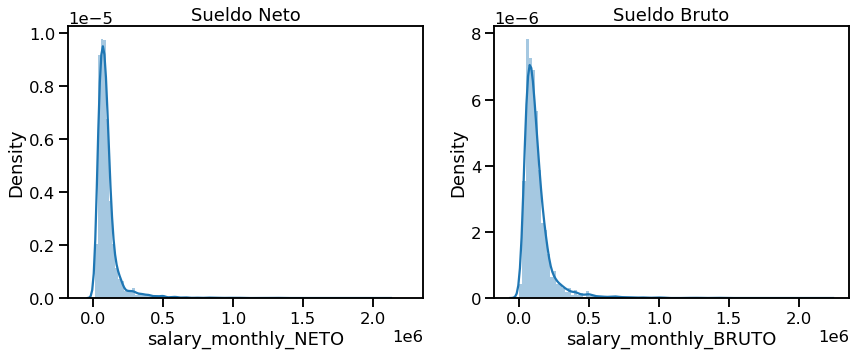

In [124]:
fig, axes = plt.subplots(1, 2 , sharex=True , figsize=(14,5))
axes[salary_monthly_NETO_index].set_title('Sueldo Neto')
axes[salary_monthly_BRUTO_index].set_title('Sueldo Bruto')

seaborn.distplot(ax = axes[salary_monthly_NETO_index] , a = df.salary_monthly_NETO, bins=100)
seaborn.distplot(ax = axes[salary_monthly_BRUTO_index] , a = df.salary_monthly_BRUTO, bins=100)

# Búsqueda de outliers - Teorema del límite central

1. Hacemos muestreo sobre df, cada muestreo toma 30 filas al azar, calcula la media. Luego hacemos el diagrama de distribucion de las medias calculadas. Asumimos que al hacer un muestro lo suficientemente grande, la distribuciones de las muestras va a ser normal, según lo indica el **teorema del limite central** 

In [36]:
def samplear_calcular_medias(cantidad_eventos_por_muestra, cantidad_muestras ,df_tmp , df):
    
    #column_names = ["salary_monthly_NETO", "salary_monthly_BRUTO"]
    #df_tmp = pd.DataFrame(columns = column_names)
    #df_tmp.shape

    for x in range (cantidad_muestras):
        if (x % 50  == 0):
            print (f" {x} ",end = "")
        medias = df.sample(n=cantidad_eventos_por_muestra,replace=True).describe()[['salary_monthly_NETO' , 'salary_monthly_BRUTO']].loc['mean', :].values
        df_tmp.loc[df_tmp.shape[0]] = [medias[0],medias[1]]
        
    return df_tmp    

In [49]:

muestras_por_iteracion = 30
cantidad_iteraciones = 5000



start = time.time()


column_names = ["salary_monthly_NETO", "salary_monthly_BRUTO"]
df_tmp1 = pd.DataFrame(columns = column_names)

print (" Cantidad de medias generadas : " , end="")
df_tmp = samplear_calcular_medias(muestras_por_iteracion, cantidad_iteraciones , df_tmp1, df)
end = time.time()
print("")
print("El proceso tardo {0} segundos".format(end - start))



 Cantidad de medias generadas :  0  50  100  150  200  250  300  350  400  450  500  550  600  650  700  750  800  850  900  950  1000  1050  1100  1150  1200  1250  1300  1350  1400  1450  1500  1550  1600  1650  1700  1750  1800  1850  1900  1950  2000  2050  2100  2150  2200  2250  2300  2350  2400  2450  2500  2550  2600  2650  2700  2750  2800  2850  2900  2950  3000  3050  3100  3150  3200  3250  3300  3350  3400  3450  3500  3550  3600  3650  3700  3750  3800  3850  3900  3950  4000  4050  4100  4150  4200  4250  4300  4350  4400  4450  4500  4550  4600  4650  4700  4750  4800  4850  4900  4950 
El proceso tardo 158.0668499469757 segundos


In [105]:
mean_values = df_tmp.describe().loc['mean', :].values
std_values = df_tmp.describe().loc['std', :].values

median_values = [ df_tmp['salary_monthly_NETO'].median() , df_tmp['salary_monthly_BRUTO'].median() ]
mode_values = [ df_tmp['salary_monthly_NETO'].mode().values[0] , df_tmp['salary_monthly_BRUTO'].mode().values[0] ]


salary_monthly_NETO_index = 0
salary_monthly_BRUTO_index = 1
num_desviaciones_std = 3

In [90]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

In [91]:
print ("Sueldo Neto")


print (f"Media: {mean_values[salary_monthly_NETO_index]}, Desviación standard: {std_values[salary_monthly_NETO_index]} Rango con {num_desviaciones_std} std = ( {mean_values[salary_monthly_NETO_index] - std_values[salary_monthly_NETO_index] * num_desviaciones_std} , {mean_values[salary_monthly_NETO_index] + std_values[salary_monthly_NETO_index] * num_desviaciones_std } )")



Sueldo Neto
Media: 99643.15364460133, Desviación standard: 17754.649918912666 Rango con 3 std = ( 46379.20388786333 , 152907.10340133932 )


In [67]:
print ("Sueldo Bruto")
print (f"Media: {mean_values[salary_monthly_BRUTO_index]}, Desviación standard: {std_values[salary_monthly_BRUTO_index]} Rango con {num_desviaciones_std} std = ( {mean_values[salary_monthly_BRUTO_index] - std_values[salary_monthly_BRUTO_index] * num_desviaciones_std} , {mean_values[salary_monthly_BRUTO_index] + std_values[salary_monthly_BRUTO_index] * num_desviaciones_std } )")



Sueldo Bruto
Media: 128541.47548986669, Desviación standard: 22896.166929407602 Rango con 3 std = ( 59852.97470164388 , 197229.9762780895 )


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


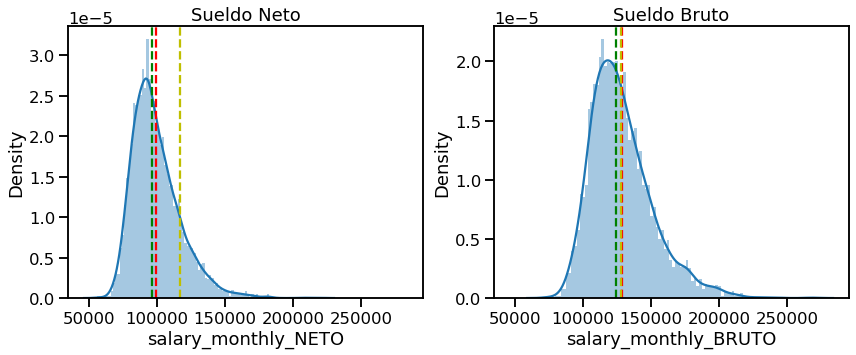

In [109]:
fig, axes = plt.subplots(1, 2 , sharex=True , figsize=(14,5))
axes[salary_monthly_NETO_index].set_title('Sueldo Neto')
axes[salary_monthly_BRUTO_index].set_title('Sueldo Bruto')

seaborn.distplot(ax = axes[salary_monthly_NETO_index] , a = df_tmp.salary_monthly_NETO, bins=100)
axes[salary_monthly_NETO_index].axvline(mean_values[salary_monthly_NETO_index], color='r', linestyle='--')
axes[salary_monthly_NETO_index].axvline(median_values[salary_monthly_NETO_index], color='g', linestyle='--')
axes[salary_monthly_NETO_index].axvline(mode_values[salary_monthly_NETO_index], color='y', linestyle='--')





#axes[salary_monthly_NETO_index].axvline(median, color='g', linestyle='--')



seaborn.distplot(ax = axes[salary_monthly_BRUTO_index] , a = df_tmp.salary_monthly_BRUTO, bins=100)
axes[salary_monthly_BRUTO_index].axvline(mean_values[salary_monthly_BRUTO_index], color='r', linestyle='--')
axes[salary_monthly_BRUTO_index].axvline(median_values[salary_monthly_BRUTO_index], color='g', linestyle='--')
axes[salary_monthly_BRUTO_index].axvline(mode_values[salary_monthly_BRUTO_index], color='y', linestyle='--')





Se puede observar que los sueldos brutos tiene una distribución que se ajusta mejor a la normal. Es por ello que es conveniente tomar como parametro los sueldos brutos

In [112]:
sueldo_bruto_rango_inferior = mean_values[salary_monthly_BRUTO_index] - std_values[salary_monthly_BRUTO_index] * num_desviaciones_std 
sueldo_bruto_rango_superior = mean_values[salary_monthly_BRUTO_index] + std_values[salary_monthly_BRUTO_index] * num_desviaciones_std 

In [121]:
f"Cantidad de sueldos a eliminar limite infeerior: {df_tmp[df_tmp.salary_monthly_BRUTO <=sueldo_bruto_rango_inferior]['salary_monthly_BRUTO'].count()}"

'Cantidad de sueldos a eliminar limite infeerior: 0'

In [122]:
f"Cantidad de sueldos a eliminar limite infeerior: {df_tmp[df_tmp.salary_monthly_BRUTO >= sueldo_bruto_rango_superior]['salary_monthly_BRUTO'].count()}"

'Cantidad de sueldos a eliminar limite infeerior: 60'

Es muy alto el número de muestras que quedan fuera del estudio. Se busca otro método

2. Excluimos percentiles bajos

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



# Búsqueda de outliers - Quantiles

<AxesSubplot:xlabel='salary_monthly_NETO'>

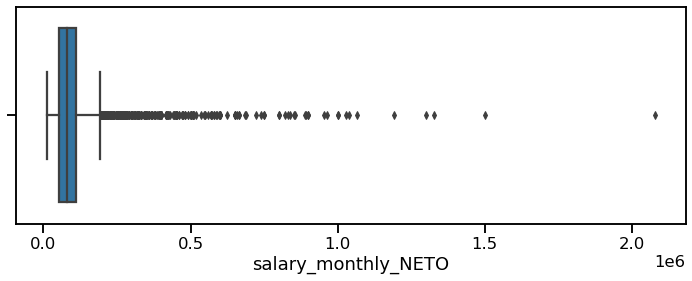

In [129]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df['salary_monthly_NETO'])

<AxesSubplot:xlabel='salary_monthly_BRUTO'>

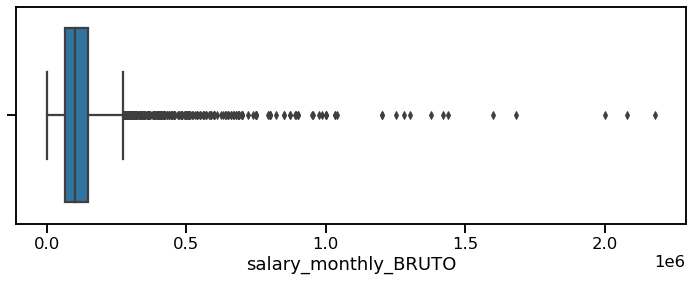

In [131]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df['salary_monthly_BRUTO'])

In [135]:
salary_monthly_NETO_quantile = df['salary_monthly_NETO'].quantile([0.25,0.5,0.75]).values
salary_monthly_BRUTO_quantile = df['salary_monthly_BRUTO'].quantile([0.25,0.5,0.75]).values

salary_monthly_BRUTO_quantile

array([ 65000., 100000., 149000.])

In [138]:
RIC_NETO = salary_monthly_NETO_quantile[2] - salary_monthly_NETO_quantile[0]
RIC_BRUTO = salary_monthly_BRUTO_quantile[2] - salary_monthly_BRUTO_quantile[0]

LS_NETO = salary_monthly_NETO_quantile[2] + RIC_NETO * 1.5
LI_NETO = salary_monthly_NETO_quantile[0] - RIC_NETO * 1.5

LS_BRUTO = salary_monthly_BRUTO_quantile[2] + RIC_BRUTO * 1.5
LI_BRUTO = salary_monthly_BRUTO_quantile[0] - RIC_BRUTO * 1.5



print (f" LS Neto: {LS_NETO} , LI Neto: {LI_NETO} , RIC Neto: {RIC_NETO}")
print (f" LS Bruto: {LS_BRUTO} , LI Neto: {LI_BRUTO} , RIC Neto: {RIC_BRUTO}")




 LS Neto: 194000.0 , LI Neto: -30000.0 , RIC Neto: 56000.0
 LS Bruto: 275000.0 , LI Neto: -61000.0 , RIC Neto: 84000.0


<AxesSubplot:xlabel='salary_monthly_BRUTO'>

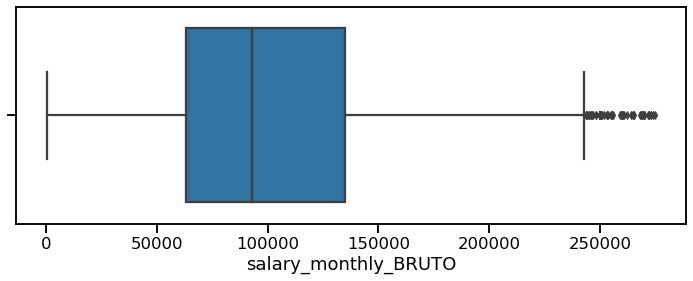

In [144]:
plt.figure(figsize=(12, 4))

df_plot = df[ (df['salary_monthly_BRUTO'] >= LI_BRUTO) & (df['salary_monthly_BRUTO'] <= LS_BRUTO) ]
 
seaborn.boxplot(x=df_plot['salary_monthly_BRUTO'])

In [25]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [26]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [27]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2502
1,sql,2145
2,html,1852
3,python,1471
4,java,1445
5,css,1237
6,bash/shell,992
7,php,887
8,.net,819
9,typescript,778


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [28]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["Python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
